<h2>View 3d plot of dE/dx, depth, and width</h2>

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as ss

In [2]:
with open('dedx-depth-width_plotdata_no-corrs.obj', 'rb') as f:
    data = pickle.load(f)

dedxs_fat, depths_fat, widths_fat, dedxs_sim40, depths_sim40, widths_sim40, dedxs_sim90, depths_sim90, widths_sim90 = data

with open('widtherrs.obj', 'rb') as f:
    widthErrs_fat = pickle.load(f)

<IPython.core.display.Javascript object>


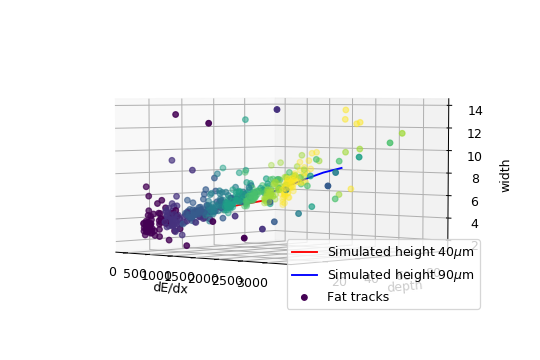

In [27]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(dedxs_fat, depths_fat, widths_fat, c=depths_fat, label='Fat tracks')
ax.plot(dedxs_sim40, depths_sim40, widths_sim40, c='r', label=r'Simulated height 40$\mu$m')
ax.plot(dedxs_sim90, depths_sim90, widths_sim90, c='b', label=r'Simulated height 90$\mu$m')
ax.set_xlabel('dE/dx')
ax.set_ylabel('depth')
ax.set_zlabel('width')
ax.view_init(20, -30)
plt.legend()

Plot seems to pretty clearly show the width dependence on height, lining up pretty well with the simulated curves. Although it seems that there are several tracks where the segment depths got flipped (i.e., the cluster of segments at low depth whose width decreases with depth), so I need to work on a better way to figure out which direction the tracks are going.

If you have any ideas on how to present this in a static image, let me know. I know some journals let you have extra online content for this purpose, but it's not that easy for slideshows or presentations...

Text(0.5, 1.0, 'Fat track segments and simulated tracks')

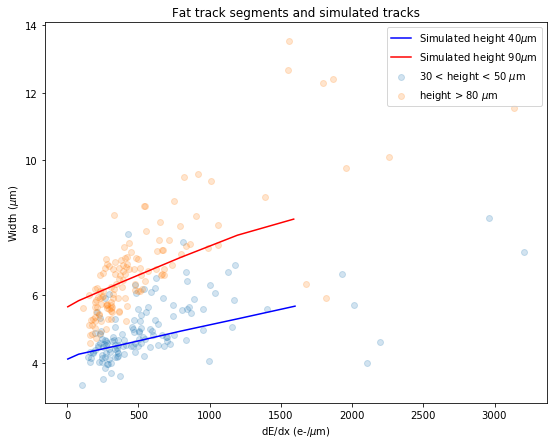

In [3]:
# %matplotlib inline

inds = np.logical_and(depths_fat>30, depths_fat<50)
inds2 = depths_fat>80

plt.figure(figsize=(9,7))
plt.scatter(dedxs_fat[inds], widths_fat[inds], alpha=0.2, label=r'30 < height < 50 $\mu$m')
plt.scatter(dedxs_fat[inds2], widths_fat[inds2], alpha=0.2, label=r'height > 80 $\mu$m')
plt.plot(dedxs_sim40, widths_sim40, c='b', label=r'Simulated height 40$\mu$m')
plt.plot(dedxs_sim90, widths_sim90, c='r', label=r'Simulated height 90$\mu$m')
plt.xlabel(r'dE/dx (e-/$\mu$m)')
plt.ylabel(r'Width ($\mu$m)')
plt.legend()
plt.title('Fat track segments and simulated tracks')

In [29]:
depths_fat[:8]

array([ 6.25, 18.75, 31.25, 43.75, 56.25, 68.75, 81.25, 93.75])

(0, 14.198470995047687)

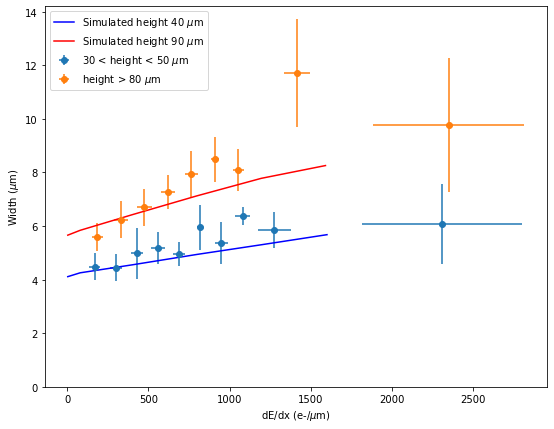

In [12]:
inds = np.logical_and(depths_fat>30, depths_fat<50)
inds2 = depths_fat>80

cts_lo,bins_lo = np.histogram(dedxs_fat[np.logical_and(inds, dedxs_fat<1600)])
bins_lo = np.append(bins_lo, np.max(dedxs_fat[inds]))
bins_lo[-2] += 1 #make second last bin include the highest dedx that's <1600

cts_hi,bins_hi = np.histogram(dedxs_fat[np.logical_and(inds2, dedxs_fat<1600)])
bins_hi = np.append(bins_hi, np.max(dedxs_fat[inds2]))
bins_hi[-2] += 1

bins_hi = np.delete(bins_hi,-3)
bins_lo = np.delete(bins_lo,-3)

means_lo,_,_ = ss.binned_statistic(dedxs_fat[inds], widths_fat[inds], 'mean', bins_lo)
std_lo,_,_ = ss.binned_statistic(dedxs_fat[inds], widths_fat[inds], 'std', bins_lo)
bin_mids_lo = (bins_lo[1:]+bins_lo[:-1])/2
xstd_lo,_,_ = ss.binned_statistic(dedxs_fat[inds], dedxs_fat[inds], 'std', bins_lo)
#replace std of bins with only one count with that count's widthErr
# where1_lo = np.where(cts_lo==1)[0]
# std_lo[where1_lo] = widthErrs_fat[inds][np.logical_and(dedxs_fat[inds]>bins_lo[where1_lo],
#                                                        dedxs_fat[inds]<bins_lo[where1_lo+1])][0]

means_hi,_,_ = ss.binned_statistic(dedxs_fat[inds2], widths_fat[inds2], 'mean', bins_hi)
std_hi,_,_ = ss.binned_statistic(dedxs_fat[inds2], widths_fat[inds2], 'std', bins_hi)
bin_mids_hi = (bins_hi[1:]+bins_hi[:-1])/2
xstd_hi,_,_ = ss.binned_statistic(dedxs_fat[inds2], dedxs_fat[inds2], 'std', bins_hi)
#replace std of bins with only one count with that count's widthErr
# where1_hi = np.where(cts_hi==1)[0]
# std_hi[where1_hi] = widthErrs_fat[inds2][np.logical_and(dedxs_fat[inds2]>bins_hi[where1_hi],
#                                                         dedxs_fat[inds2]<bins_hi[where1_hi+1])][0]

plt.figure(figsize=(9,7))
plt.errorbar(bin_mids_lo,means_lo,std_lo,xstd_lo, fmt='o', label=r'30 < height < 50 $\mu$m')
plt.errorbar(bin_mids_hi,means_hi,std_hi,xstd_hi, fmt='o', label=r'height > 80 $\mu$m')
plt.plot(dedxs_sim40, widths_sim40, c='b', label=r'Simulated height 40 $\mu$m')
plt.plot(dedxs_sim90, widths_sim90, c='r', label=r'Simulated height 90 $\mu$m')
plt.xlabel(r'dE/dx (e-/$\mu$m)')
plt.ylabel(r'Width ($\mu$m)')
plt.legend(loc=2)
# plt.title('Binned fat track segments and simulated tracks')
plt.ylim(0)

In [6]:
cts_lo

array([17, 38, 17, 23, 12,  8,  5,  2,  3,  1], dtype=int64)

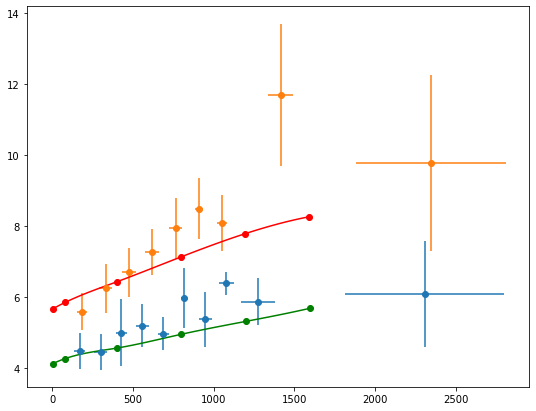

In [20]:
from scipy.interpolate import interp1d

f40 = interp1d(dedxs_sim40, widths_sim40, kind='cubic', fill_value='extrapolate')
f90 = interp1d(dedxs_sim90, widths_sim90, kind='cubic', fill_value='extrapolate')

x = np.linspace(4,1600,100)

plt.figure(figsize=(9,7))
plt.errorbar(bin_mids_lo,means_lo,std_lo,xstd_lo, fmt='o')
plt.errorbar(bin_mids_hi,means_hi,std_hi,xstd_hi, fmt='o')
plt.plot(x,f40(x),c='g')
plt.plot(x,f90(x),c='r')
plt.scatter(dedxs_sim40,widths_sim40,c='g')
plt.scatter(dedxs_sim90,widths_sim90,c='r')

In [18]:
print(means_hi)
print(bin_mids_hi)
print(std_hi)
print(cts_hi)

[ 5.57540902  6.23473985  6.69249775  7.26313033  7.93316759  8.48771183
  8.08962363 11.70601841  9.76694515]
[ 186.39838582  330.91775587  475.43712593  619.95649599  764.47586604
  908.9952361  1053.51460616 1415.3130313  2347.95368039]
[0.52098033 0.69985378 0.69202979 0.63838105 0.85527445 0.85054359
 0.78969302 2.00423727 2.48408616]
[ 32.2766906   42.33460096  44.2425287   44.99153952  41.6115862
  24.02255598  32.52349745   0.          77.53508241 466.10583095]
[33 41 21 13  7  3  4  1  2]


In [19]:
#remove the nan from the hi
where0 = np.where(cts_hi==0)[0]
cts_hi = np.delete(cts_hi, where0)
means_hi = np.delete(means_hi, where0)
bin_mids_hi = np.delete(bin_mids_hi, where0)
std_hi = np.delete(std_hi, where0)
xstd_hi = np.delete(xstd_hi, where0)

In [23]:
#exclude final bin from chi square
chisq40 = np.sum( (means_lo[:-1]-f40(bin_mids_lo[:-1]))**2 / std_lo[:-1]**2 )
chisq90 = np.sum( (means_hi[:-1]-f90(bin_mids_hi[:-1]))**2 / std_hi[:-1]**2 ) #also that outlier in the high data

rchisq40 = chisq40/(len(means_lo)-1)
rchisq90 = chisq90/(len(means_hi)-1)
rchisq_tot = (chisq40+chisq90)/(len(means_lo)+len(means_hi)-2)

In [24]:
print(rchisq40)
print(rchisq90)
print(rchisq_tot)

1.819058391883313
1.0092717712996075
1.4379823351380399


In [17]:
print(chisq40)
print(chisq90)

17.259058298026932
9.868985905938343
